# **Melbourne Housing Snapshot**

Finding the insight on the next big trend to become a real estate mogul.

Notes on Specific Variables:-
* Rooms: Number of rooms
* Price: Price in dollars
* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* SellerG: Real Estate Agent
* Date: Date sold
* Distance: Distance from CBD
* Regionname: General Region (West, North West, North, North east …etc)
* Propertycount: Number of properties that exist in the suburb.
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* Landsize: Land Size
* BuildingArea: Building Size
* CouncilArea: Governing council for the area
![](http://)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

import missingno as msno 

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

#Subplots
from plotly.subplots import make_subplots

#Showing full path of datasets
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')


/kaggle/input/melbourne-housing-snapshot/melb_data.csv


# Import Dataset

In [2]:
#reading the dataframe
melbourne_data=pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')



# Dataset Info

In [3]:
#First 5 rows of our dataset

melbourne_data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
#Number of rows and columns
melbourne_data.shape


(13580, 21)

The data frame contain 13580 rows and 21 coloumns

In [5]:
#Columns in our dataset
melbourne_data.columns.unique()

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
#Description of our dataset
melbourne_data.describe().T

#T refers to transpose that displays the description of our dataset in long format.


,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


From the above description we can understand that :
1. The average Price of the house is 1.075684e+06 
2. The average Land size is 558.416127
3. The lowest price of the house is 8.500000e+04 and the highest price is  9.000000e+06

In [7]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
#summary of a dataframe
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

The above information tells us
* Our dataset features consists of three datatypes
    
    1)float64
    
    2)integer64
    
    3)object
* Total numerical features are 38 and categorical features are 43.

In [9]:
melbourne_data.dtypes.value_counts()
#it will give the different types of data type present in the data frame and its count

float64    12
object      8
int64       1
dtype: int64

In [10]:


#Let us examine numerical features in the train dataset
num_col=melbourne_data.select_dtypes(exclude='object')


#Let us examine categorical features in the train dataset
cat_col=melbourne_data.select_dtypes(exclude=['int64','float64'])

lets look on missing values

In [11]:
num_col.isnull().sum()
# let's try to visualize the number of missing values in each numerical feature.

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [12]:
cat_col.isnull().sum()
# let's try to visualize the number of missing values in each categorical feature.

Suburb            0
Address           0
Type              0
Method            0
SellerG           0
Date              0
CouncilArea    1369
Regionname        0
dtype: int64

In [13]:
num_col.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


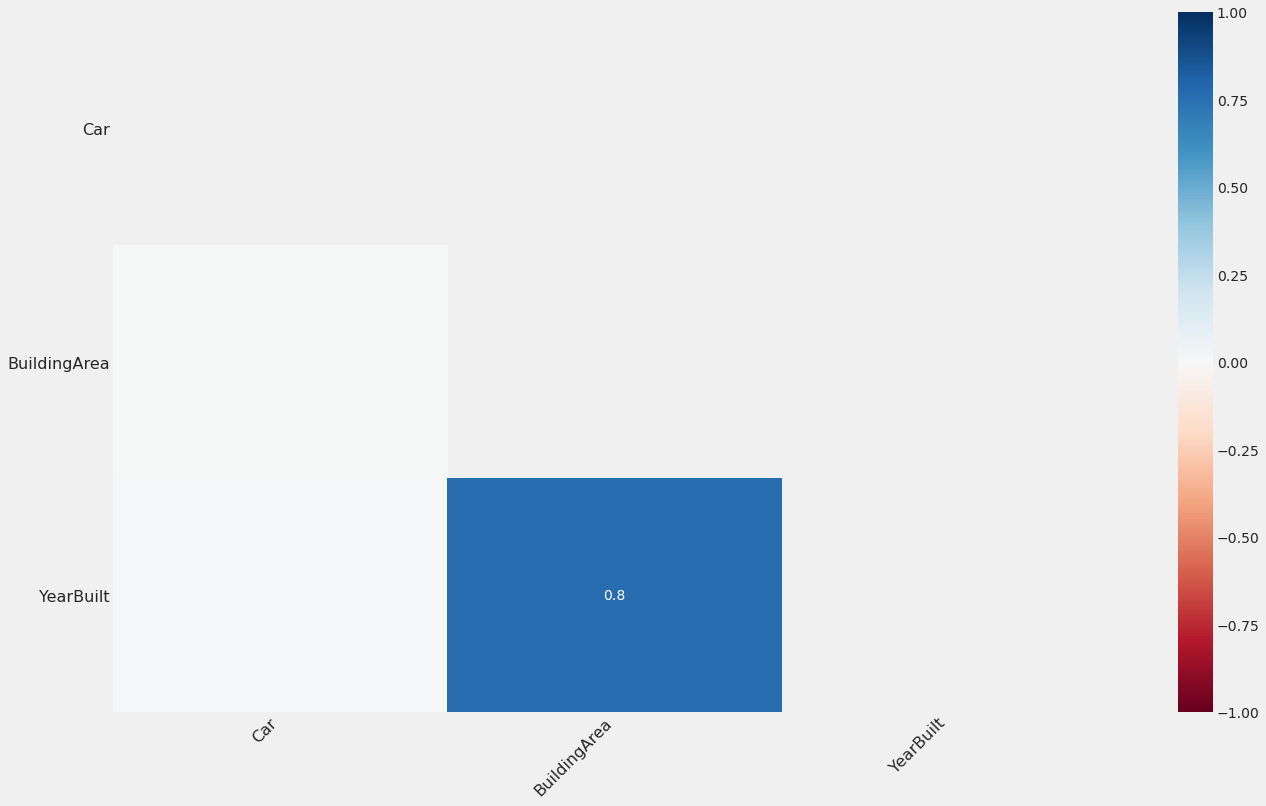

In [14]:
msno.heatmap(num_col);
#it will give the heatmap of missing value of numerical feature

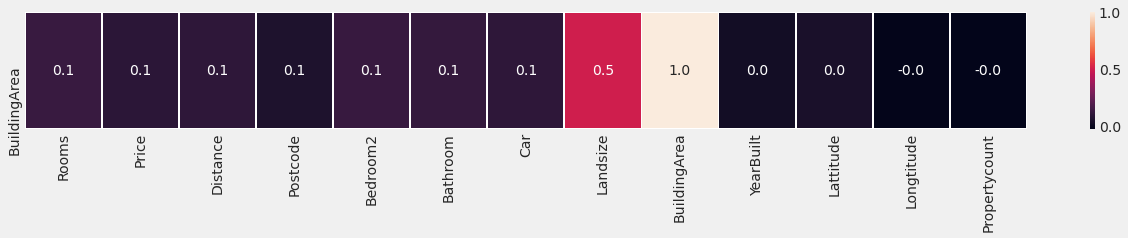

In [15]:
#correlation map
f,ax = plt.subplots(figsize=(20,2))
sns.heatmap(num_col.corr().iloc[8:9,:], annot=True, linewidths=.8, fmt= '.1f',ax=ax)

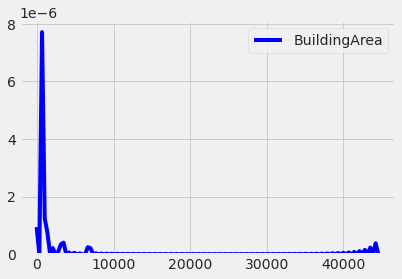

In [16]:
sns.kdeplot(num_col.BuildingArea,Label='BuildingArea',color='b');

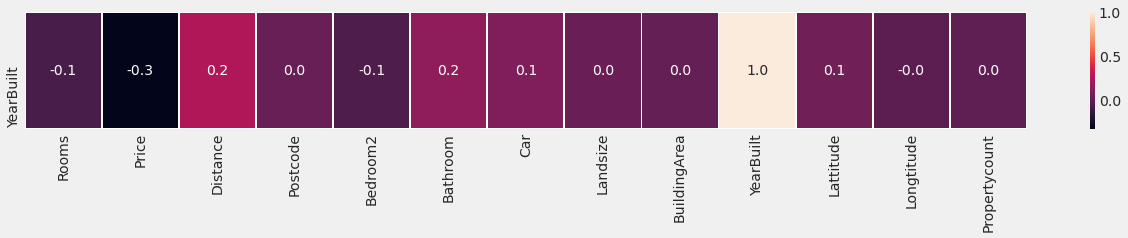

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(20,2))
sns.heatmap(num_col.corr().iloc[9:10,:], annot=True, linewidths=.8, fmt= '.1f',ax=ax)

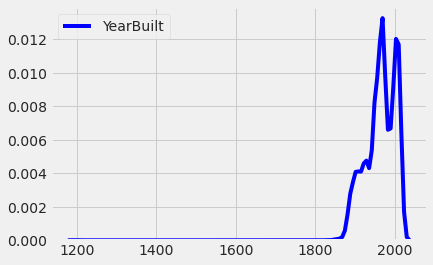

In [18]:
sns.kdeplot(num_col.YearBuilt,Label='YearBuilt',color='b');

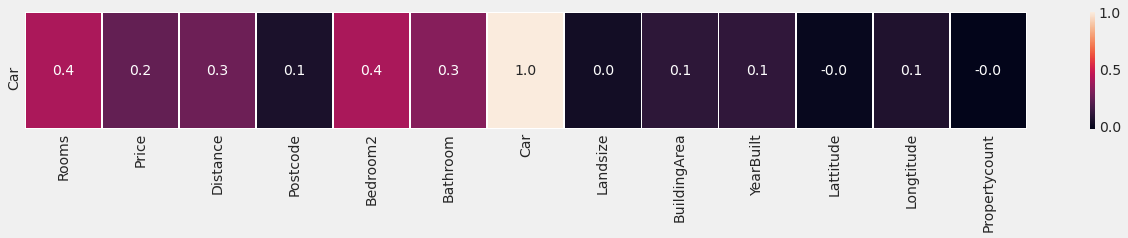

In [19]:
#correlation map
f,ax = plt.subplots(figsize=(20,2))
sns.heatmap(num_col.corr().iloc[6:7,:], annot=True, linewidths=.8, fmt= '.1f',ax=ax)

From the above we can understand the value of car is slightly correlated with Number of rooms and Bedroom2

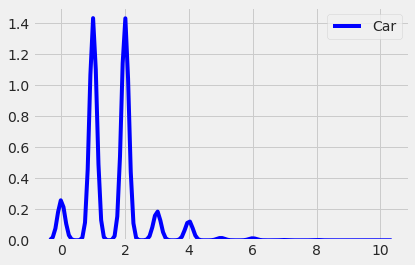

In [20]:
sns.kdeplot(num_col.Car,Label='Car',color='b');

In [21]:
melbourne_data.groupby(['Rooms'])['Car'].mean()

Rooms
1     0.883481
2     1.129210
3     1.697881
4     2.062221
5     2.310403
6     2.582090
7     2.600000
8     3.375000
10    2.000000
Name: Car, dtype: float64

In [22]:
melbourne_data.mode(axis=0)
#Get the mode(s) of each element along the selected axis.
#The mode of a set of values is the value that appears most often. It can be multiple values.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Reservoir,1/1 Clarendon St,3.0,h,1100000.0,S,Nelson,27/05/2017,11.2,3073.0,...,1.0,2.0,0.0,120.0,1970.0,Moreland,-37.8361,144.9966,Southern Metropolitan,21650.0
1,NaN,13 Robinson St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,14 Arthur St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2 Bruce St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,28 Blair St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,36 Aberfeldie St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,5 Charles St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5 Margaret St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,53 William St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Replaced the nan value in the car with mode value ie,2
melbourne_data.Car.replace({np.nan:2},inplace=True)


In [24]:
#Replaced the nan value in the BuildingArea with mean
melbourne_data['BuildingArea'].replace({np.nan:melbourne_data['BuildingArea'].mean()},inplace=True)

In [25]:
melbourne_data['CouncilArea']=melbourne_data['CouncilArea'].replace(np.NaN,0)

In [26]:
#Replaced the nan value in the car with YearBuilt
melbourne_data['YearBuilt'].replace({np.NaN:melbourne_data['YearBuilt'].mean()},inplace=True)

In [27]:
melbourne_data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


# Target Feature

**Sales price**

In [28]:
melbourne_data['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

* Our target feature is a continuous variable with values ranging from 8.500000e+04 to 9.000000e+06.
* The average sale price of all the houses in our dataset is 1.075684e+06

Text(0.5, 1.0, 'Price')

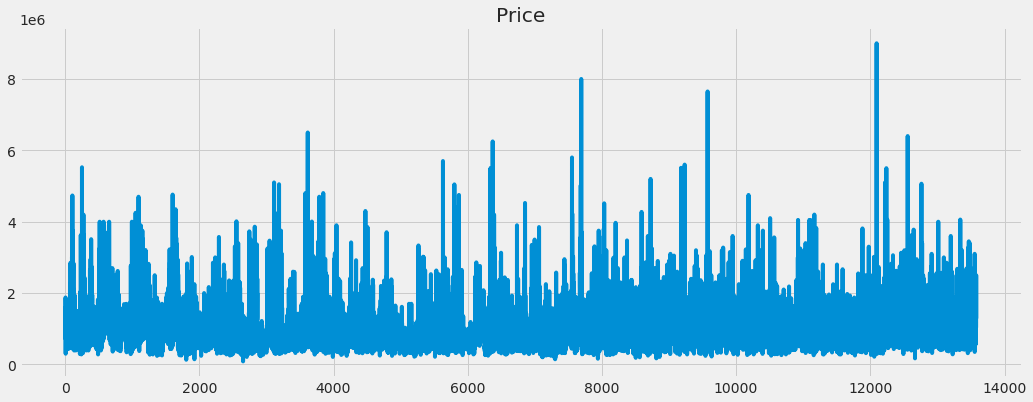

In [29]:
plt.figure(figsize=(16,6))
sns.lineplot(data=melbourne_data['Price'])
plt.title('Price')

**Analysis of features against sale price**

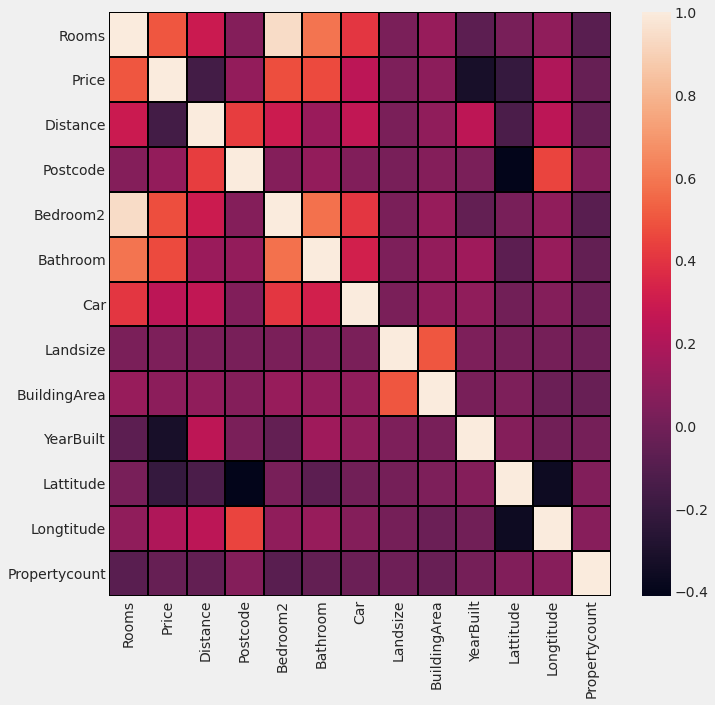

In [30]:
#Creating a heat map of all the numerical features.
plt.figure(figsize=(10,10))
mat = np.round(num_col.corr(), decimals=2)
sns.heatmap(data=mat, linewidths=1, linecolor='black');

In [31]:


#Getting features that have a correlation value greater than 0.5 against sale price.
for val in range(len(mat['Price'])):
    if abs(mat['Price'].iloc[val]) > 0.3:
        print(mat['Price'].iloc[val:val+1]) 



Rooms    0.5
Name: Price, dtype: float64
Price    1.0
Name: Price, dtype: float64
Bedroom2    0.48
Name: Price, dtype: float64
Bathroom    0.47
Name: Price, dtype: float64
YearBuilt   -0.32
Name: Price, dtype: float64


Rooms,Bedroom2,Bathroom are highly correlated with price

# **Analysis by Regional features**

In [32]:

melbourne_data.groupby(['Regionname','CouncilArea'])['Price'].mean()

Regionname            CouncilArea
Eastern Metropolitan  0              1.186870e+06
                      Banyule        9.832436e+05
                      Boroondara     2.200000e+06
                      Knox           8.957555e+05
                      Manningham     1.236242e+06
                                         ...     
Western Metropolitan  Moreland       6.844048e+05
                      Wyndham        5.318134e+05
Western Victoria      0              4.497143e+05
                      Melton         3.869896e+05
                      Moorabool      2.850000e+05
Name: Price, Length: 61, dtype: float64

From the above we can understand that which are the council area belongs to the region area and the above will help the people to find out the proper area and its price.it may help the buyer to select the proper area within his budget.

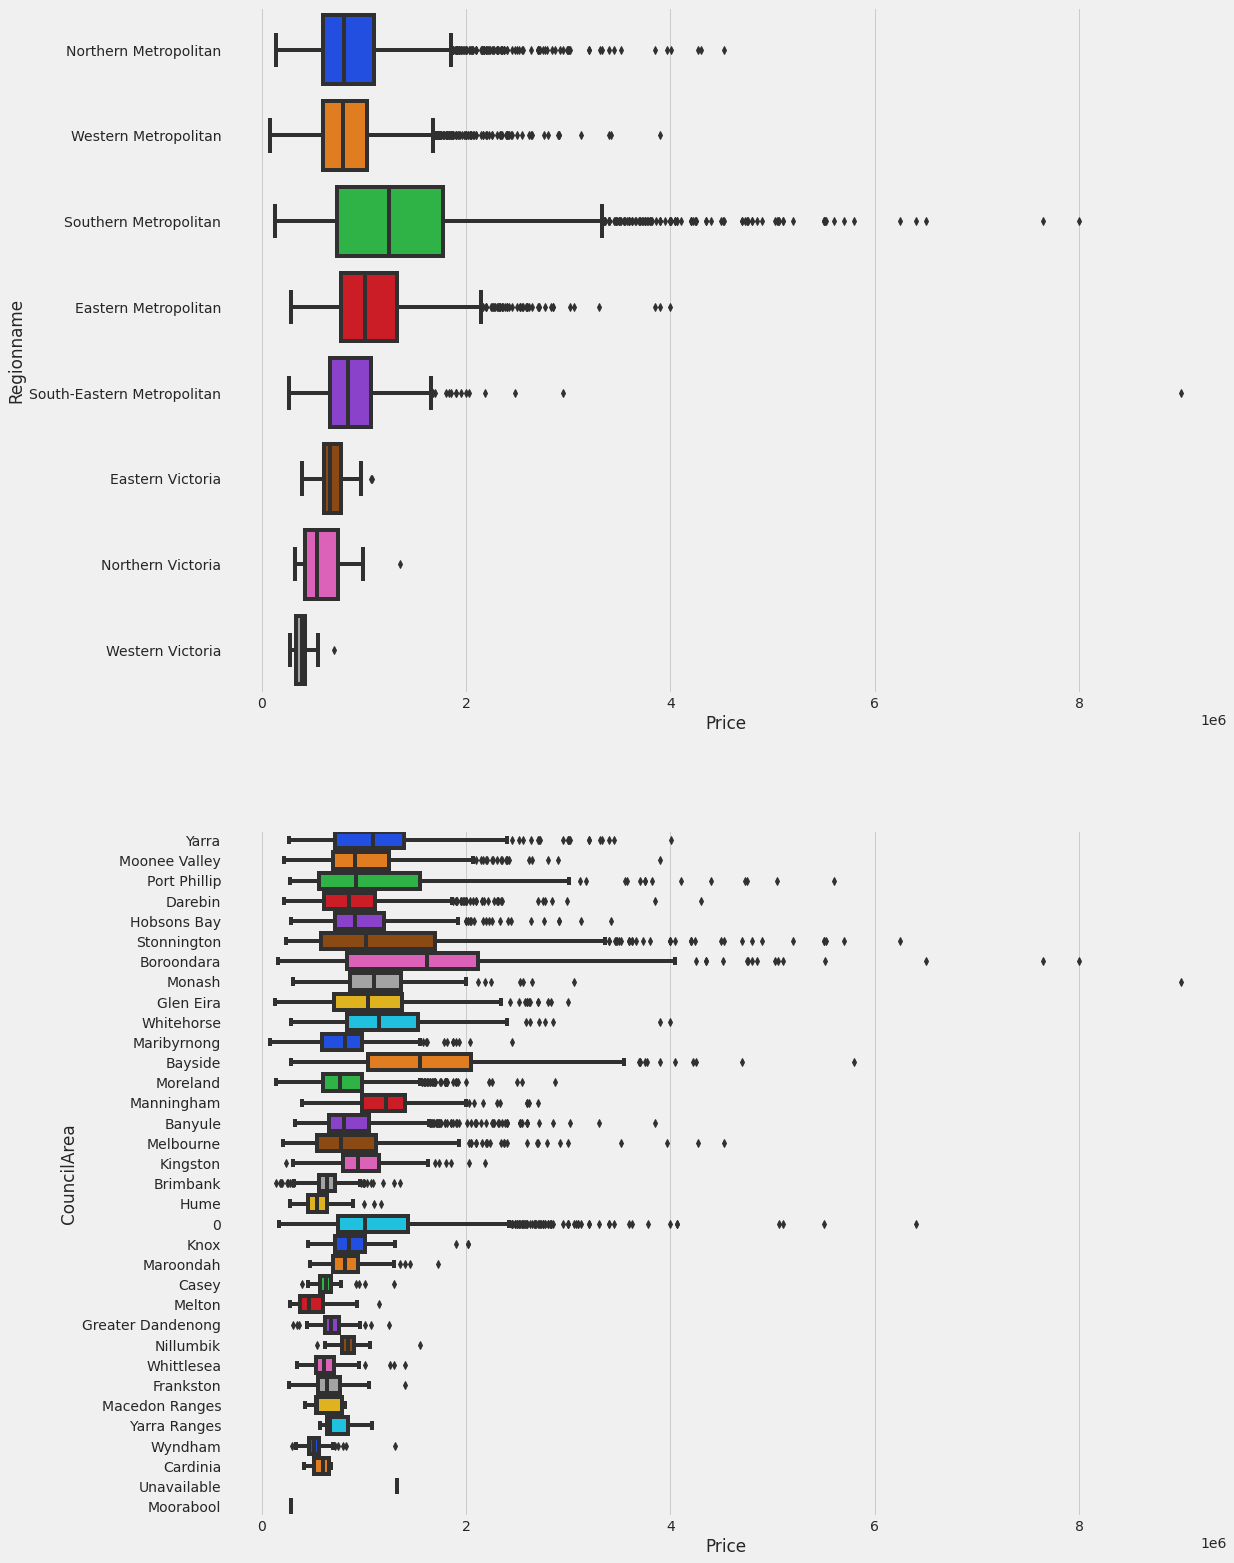

In [33]:
#analysis by Regional features
region_feature=['Regionname','CouncilArea']
plt.figure(figsize=(16,40))
i=1
for feature in region_feature:
    plt.subplot(3,1,i)
    sns.boxplot(y=melbourne_data[feature],x=melbourne_data['Price'],palette="bright")
    plt.ylabel(feature)
    i+=1


From the graph, we can see that from region wise graph Southern Metropolitan has the highest price and even the median is also high, and when we look on the counsil area graph Boroondra has the highest median and price which belongs to the southern metropolitan and the lowest is moorabool and melton from the Western Victoria region

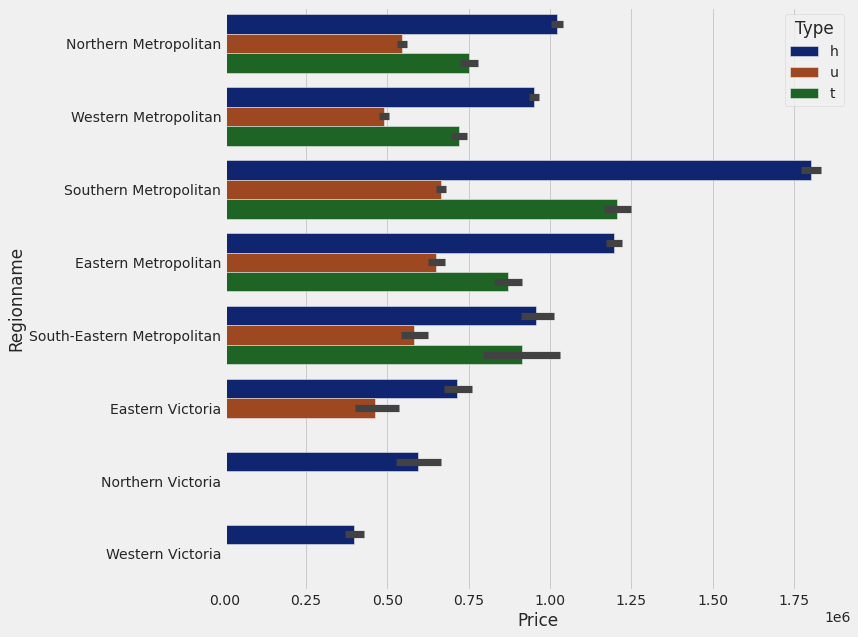

In [34]:
#we can analyse the price and type by region wise
plt.figure(figsize=(10,10))
sns.barplot(x=melbourne_data['Price'],y=melbourne_data['Regionname'],hue=melbourne_data['Type'],palette='dark');

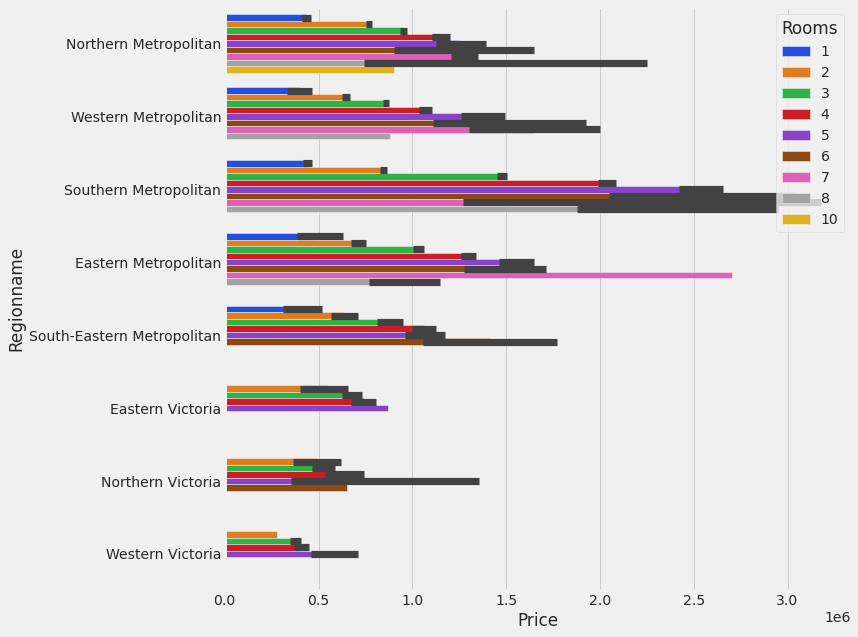

In [35]:
#we can analyse the price and Rooms by region wise
plt.figure(figsize=(10,10))
sns.barplot(x=melbourne_data['Price'],y=melbourne_data['Regionname'],hue=melbourne_data['Rooms'],palette='bright');

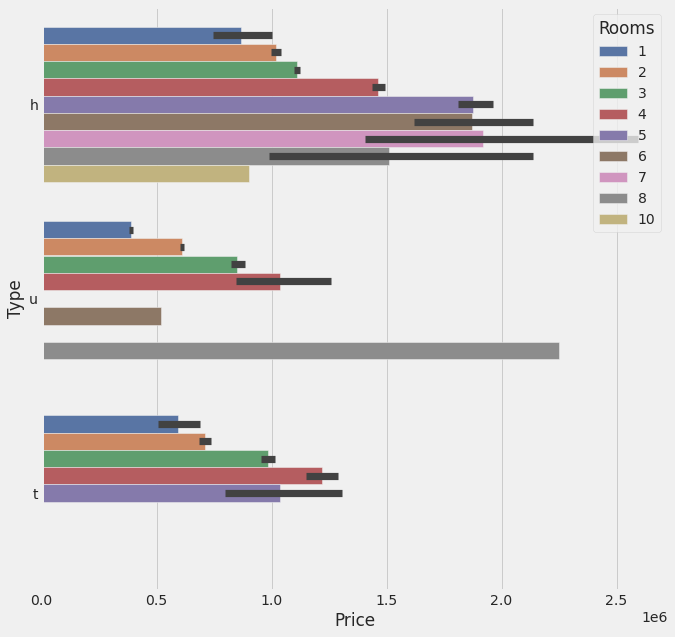

In [36]:
#we can analyse the price and Rooms by region wise
plt.figure(figsize=(10,10))
sns.barplot(x=melbourne_data['Price'],y=melbourne_data['Type'],hue=melbourne_data['Rooms'],palette='deep');

Type:
h - house,cottage,villa, semi,terrace;

u - unit, duplex(A duplex is a multi-family home that has two units in one building — regardless of how those homes are arranged. Units can be side-by-side or stacked on top of each other. Duplex buildings also have two separate entrances for each unit. This means each tenant has their own entrance)

t - townhouse; 


From the above 3 graphs key points:-
* Northern Victoria and Western Victoria has only h type ie,the model is like only house,cottage,villa,semi,terrace.These area may be less developed region thats why the price of this region is comparitively less here for type h.
* When we look the type we can understand Eastern Victoria region is better developed (construction wise)than both Northern and Western victoria.
*  By looking the Buildings number of rooms,In Northern Metropolitan,Eastern Metropolitan and Southern Metropolitan having a spread of rooms available with 1 to 10,that means it is a proper well developed city having small shops,small rental houses,etc to large flats,shopping malls,appartments,etc(Every type of buildings available in the region from type graph).Even the Price of this area is high comparing with other region,Well Development will be the reason for the increase of price.



# Analysis by roomfeatures

In [37]:
melbourne_data.groupby(['Rooms','Bathroom'])['Price'].mean()

Rooms  Bathroom
1      0.0         7.605000e+05
       1.0         4.260563e+05
       2.0         1.252000e+06
2      0.0         7.060263e+05
       1.0         7.566924e+05
       2.0         8.873956e+05
       3.0         1.028000e+06
3      0.0         1.116909e+06
       1.0         9.939926e+05
       2.0         1.159652e+06
       3.0         1.417752e+06
       4.0         2.577160e+06
       5.0         1.510000e+06
       6.0         1.385500e+06
4      0.0         1.318000e+06
       1.0         1.210327e+06
       2.0         1.383942e+06
       3.0         1.797590e+06
       4.0         2.623549e+06
       5.0         1.060000e+06
       8.0         7.600000e+05
5      1.0         1.600000e+06
       2.0         1.548305e+06
       3.0         1.914004e+06
       4.0         2.973872e+06
       5.0         2.782680e+06
       6.0         2.330000e+06
       7.0         3.900000e+06
6      1.0         1.482500e+06
       2.0         1.516500e+06
       3.0         1.800

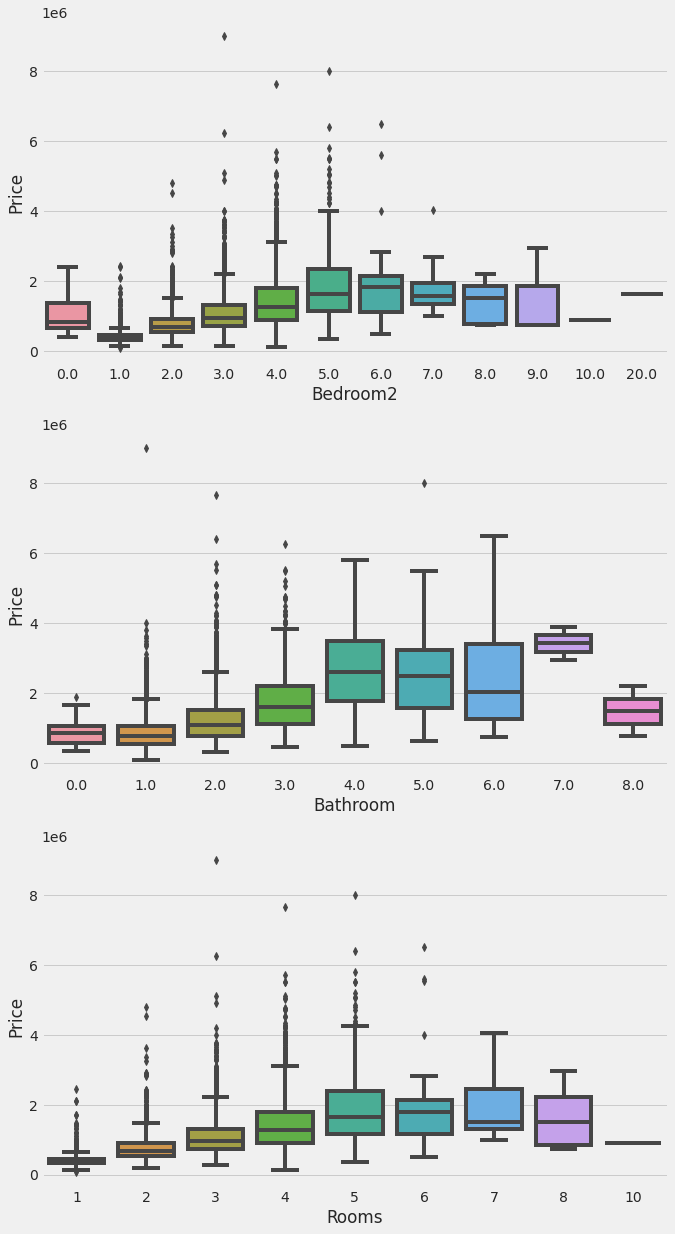

In [38]:
#analysis by roomfeatures
room_feature=['Bedroom2','Bathroom','Rooms']
plt.figure(figsize=(10,20))
i=1
for feature in room_feature:
    plt.subplot(3,1,i)
    sns.boxplot(x=melbourne_data[feature],y=melbourne_data['Price'])
    plt.xlabel(feature)
    i+=1

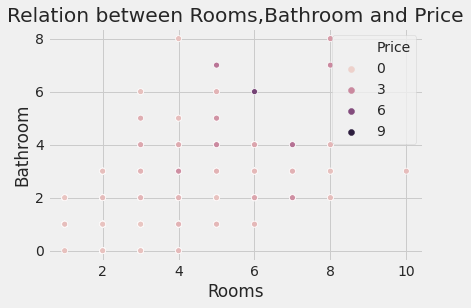

In [39]:
plt.title('Relation between Rooms,Bathroom and Price')
sns.scatterplot(y=melbourne_data['Bathroom'],x=melbourne_data['Rooms'],hue=melbourne_data['Price']);

From the above graphs:-
* we can get an idea that the rooms having 5 and 7 bathroom have  highest mean price
* if the number of room is less price is less 
* In the case of the building having 10 room the price is less it is because the no: of bathroom in that building is only 3,it is not sufficient.so no: of bathroom is made the price different here.
* when we look in the case of more number of rooms the price is less only when the sufficient number of bathroom is not available there.otherwise the price of that building is very high.


# **Please upvote**